In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sklearn.datasets as datasets
import sklearn.decomposition as decomposition
import sklearn.preprocessing as preprocessing
from sklearn.metrics import accuracy_score

from mlgrad.funcs import Exp, Hinge, Hinge2, Sigmoidal
import mlgrad.plots as plots
from sys import float_info

from math import sqrt

In [2]:
from mlgrad.cls import MarginMaximization

In [3]:
X, Y = datasets.load_digits(return_X_y=True)

In [4]:
X17 = X[(Y == 1) | (Y == 7)]
Y17 = Y[(Y == 1) | (Y == 7)]
np.putmask(Y17, Y17 == 1, 1)
np.putmask(Y17, Y17 == 7, -1)
Y17 = Y17.astype('d')
N = len(Y17)

In [5]:
mm = MarginMaximization(Hinge(1.0), h=0.01, tol=1.0e-8, n_iter=5000)

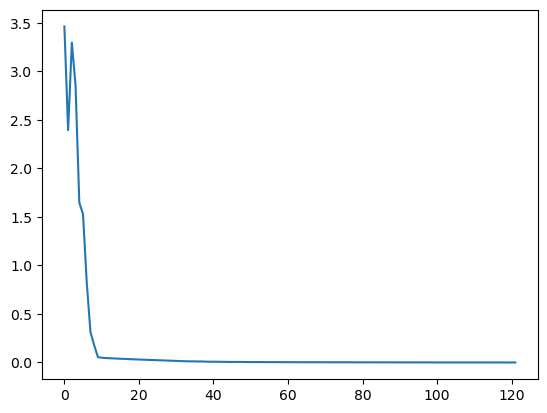

120
[-0.109 -0.162 -0.050 -0.102  0.064  0.093 -0.198 -0.108  0.161 -0.174
 -0.090  0.116 -0.048 -0.179 -0.174  0.020 -0.107  0.054 -0.021  0.226
 -0.019  0.102 -0.197 -0.037 -0.181 -0.106 -0.013  0.336  0.007 -0.194
  0.065  0.121  0.008  0.064 -0.082 -0.089 -0.200 -0.032 -0.129 -0.152
  0.036 -0.120  0.007  0.054  0.145  0.086  0.012 -0.181  0.135  0.146
 -0.082 -0.080  0.072 -0.013 -0.107  0.179 -0.048 -0.035 -0.029  0.062
  0.230  0.226 -0.037 -0.132] [ 1.753e-05  1.958e-05 -2.376e-04 -6.754e-04 -7.779e-04 -5.502e-04
 -1.472e-04 -6.385e-06 -2.593e-05 -1.289e-05 -4.894e-04 -6.643e-04
 -6.322e-04 -5.926e-04 -1.605e-04 -1.826e-05  1.707e-05 -4.833e-05
 -2.562e-04 -2.634e-04 -4.573e-04 -6.068e-04 -8.671e-05  2.637e-06
  2.910e-05 -3.044e-05 -2.553e-04 -4.671e-04 -7.007e-04 -5.804e-04
 -2.363e-04 -1.951e-05 -1.328e-06 -8.897e-05 -4.335e-04 -7.143e-04
 -7.868e-04 -5.838e-04 -1.919e-04  2.460e-05 -5.793e-06 -4.608e-05
 -2.969e-04 -6.434e-04 -6.927e-04 -2.892e-04 -3.842e-05  2.913e-05
 -2.

In [6]:
mm.fit(X17, Y17)
plt.plot(mm.lvals)
plt.show()
print(mm.K)
print(mm.w, mm.c)

In [7]:
accuracy_score(Y17, np.sign(mm.evaluate(X17)))

1.0

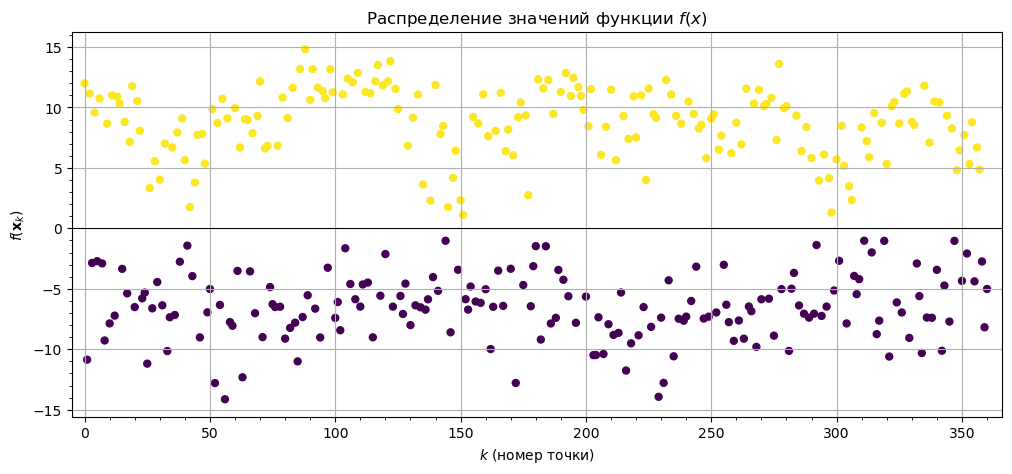

In [8]:
plt.figure(figsize=(12,5))
plots.plot_cls_function(mm, X17, Y17)
plt.show()

In [19]:
X17_0 = X17 - mm.c
X17_1 -= np.outer(X17_0 @ mm.w, mm.w)

In [10]:
mm1 = MarginMaximization(Hinge(1.0), h=0.02, tol=1.0e-8, n_iter=5000)

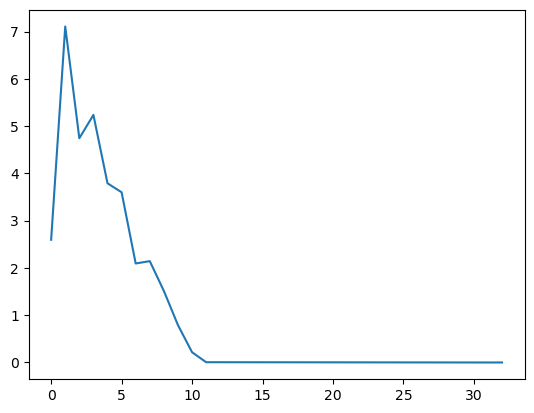

31
[-0.034  0.042 -0.074  0.012 -0.196 -0.095 -0.010  0.071  0.034 -0.096
 -0.170 -0.108  0.143  0.088 -0.136 -0.022 -0.051 -0.127  0.060  0.332
  0.184 -0.207  0.001  0.023  0.114  0.108  0.218 -0.040 -0.053 -0.175
 -0.258  0.046  0.077 -0.180 -0.031  0.068  0.059 -0.156 -0.023  0.196
  0.120 -0.053  0.045 -0.165 -0.045  0.114  0.001  0.047  0.051 -0.142
  0.080 -0.031  0.161  0.088  0.035 -0.072  0.139 -0.081 -0.054 -0.045
  0.348  0.223  0.089  0.024] [-2.635e-04 -9.881e-05 -1.262e-03 -3.503e-03 -4.507e-03 -2.718e-03
 -1.047e-03 -1.264e-05  3.387e-04 -6.531e-04 -2.576e-03 -4.343e-03
 -4.142e-03 -3.288e-03 -1.514e-03 -9.870e-05 -3.208e-04 -6.755e-04
 -1.896e-03 -2.304e-03 -3.594e-03 -3.445e-03 -7.384e-04  1.300e-05
  1.168e-04 -3.330e-04 -1.789e-03 -3.616e-03 -4.665e-03 -3.581e-03
 -1.291e-03  3.213e-04  2.613e-04 -9.319e-04 -2.794e-03 -4.075e-03
 -4.765e-03 -2.986e-03 -7.624e-04  4.236e-04  4.419e-04 -5.735e-04
 -1.761e-03 -4.217e-03 -4.179e-03 -1.218e-03 -1.152e-04 -1.007e-04
  3.5

In [11]:
mm1.fit(X17_1, Y17)
plt.plot(mm1.lvals)
plt.show()
print(mm1.K)
print(mm1.w, mm1.c)

In [22]:
accuracy_score(Y17, np.sign(mm1.evaluate(X17_1)))

1.0

In [23]:
U1 = X17_0 @ mm.w
U2 = X17_0 @ mm1.w

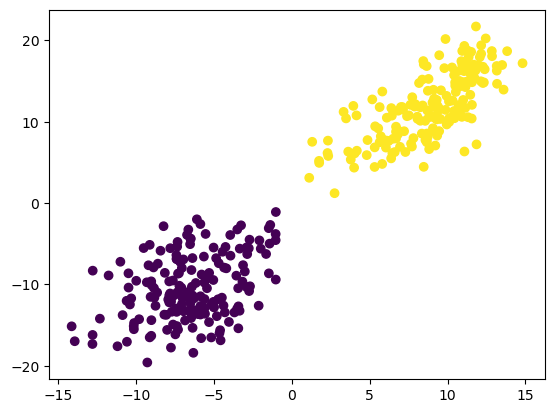

In [24]:
plt.scatter(U1, U2, c=Y17)

In [15]:
import sys

In [16]:
sys.float_info.max

1.7976931348623157e+308